In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


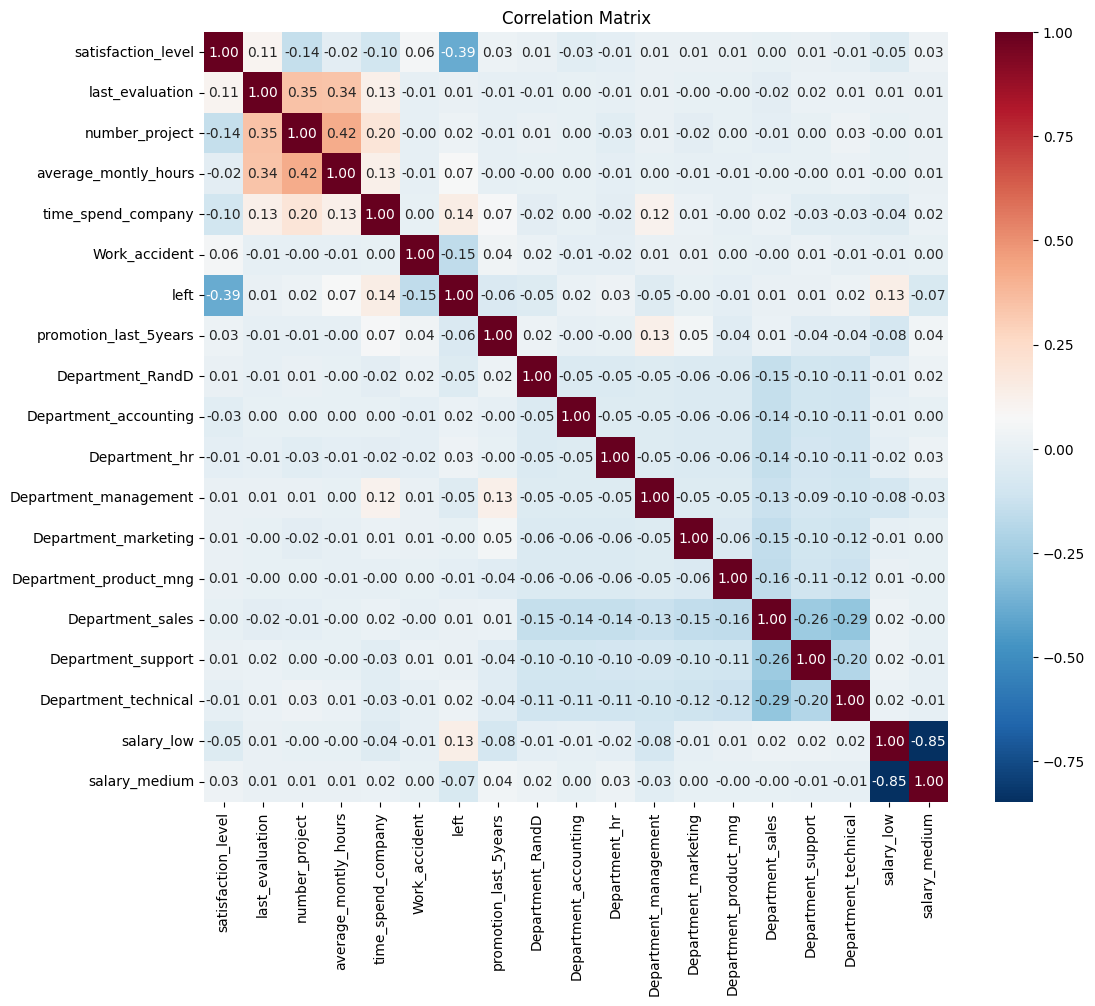

In [5]:
# Encode categorical columns using one-hot encoding
data_encoded = pd.get_dummies(df, columns=['Department', 'salary'], drop_first=True)

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu_r', cbar=True)
plt.title('Correlation Matrix')
plt.show()



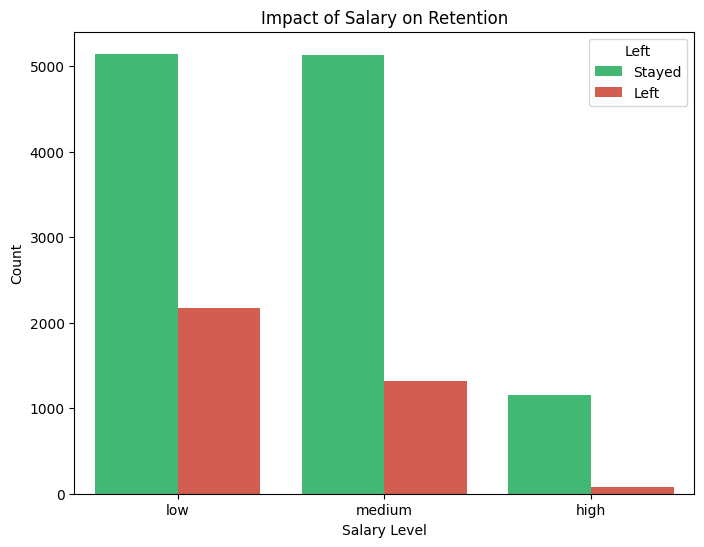

In [6]:
# Plot bar charts showing impact of employee salaries on retention.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='salary', hue='left', palette=['#2ecc71', '#e74c3c'])
plt.title('Impact of Salary on Retention')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()


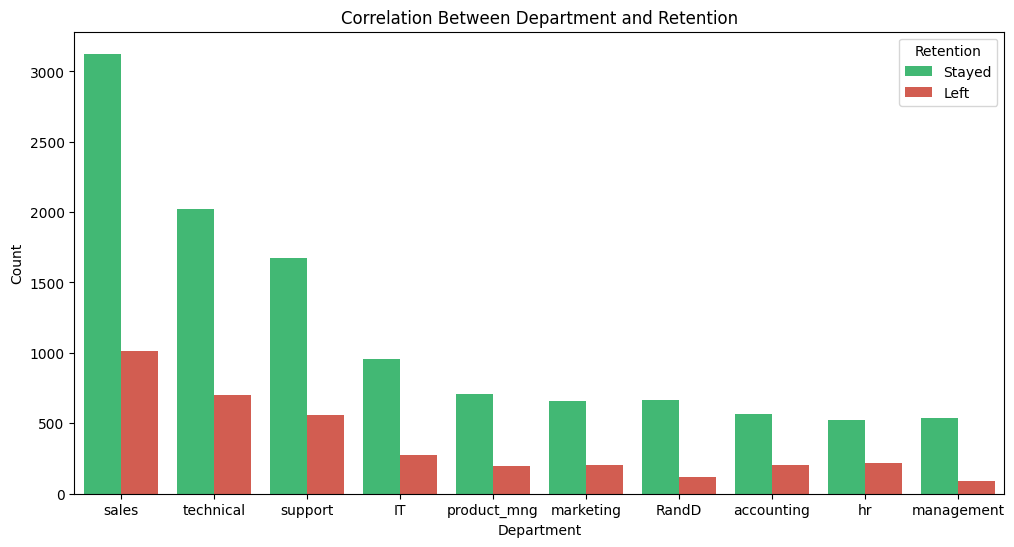

In [7]:
# Plot bar charts showing corelation between department and employee retention.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', hue='left', palette=['#2ecc71', '#e74c3c'], order=df['Department'].value_counts().index)
plt.title('Correlation Between Department and Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Retention', labels=['Stayed', 'Left'])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Encoding categorical variables, 00 for low, 01 high, 10 medium
data_encoded = pd.get_dummies(df, columns=['Department', 'salary'], drop_first=True)

X = data_encoded.drop(columns=['left'])
y = data_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

c:\Users\devas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print(f"Model Accuracy: {accuracy * 100}%\n")
print("Confusion Matrix:")
print(f"True Negatives (Stayed correctly classified): {conf_matrix[0, 0]}")
print(f"False Positives (Predicted Left but Stayed): {conf_matrix[0, 1]}")
print(f"False Negatives (Predicted Stayed but Left): {conf_matrix[1, 0]}")
print(f"True Positives (Left correctly classified): {conf_matrix[1, 1]}\n")

print("Classification Report:")
print(classification_rep)


Model Accuracy: 80.29166666666666%

Confusion Matrix:
True Negatives (Stayed correctly classified): 8525
False Positives (Predicted Left but Stayed): 632
False Negatives (Predicted Stayed but Left): 1733
True Positives (Left correctly classified): 1110

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      9157
           1       0.64      0.39      0.48      2843

    accuracy                           0.80     12000
   macro avg       0.73      0.66      0.68     12000
weighted avg       0.79      0.80      0.78     12000

